# Communicating Data

Topics
- Identifying effective and ineffective visualizations
  - Scatter plot
  - Line graph
  - Bar Chart
  - Histogram
  - Box Plot
- Recognizing when charts are attempting to "trick" the audience
  - Fox News graph lol
- Being able to identify causation versus correlation
  - Confounding factors
  - Coincidence
  - Simpsons Paradox
- Constructing appealing visuals that offer valuable insight

## Identifying effective and inneffective visualizations

Keypoint: Ideally a reader will not have to spend more than 5-6 seconds digesting a single visualization

Basic types of graphs examined
- Scatter plots
- Line graphs
- Bar charts
- Histograms
- Box plots


## Scatter Plots
Simple, easy to see correlations

<AxesSubplot:xlabel='hours_tv_watched', ylabel='work_performance'>

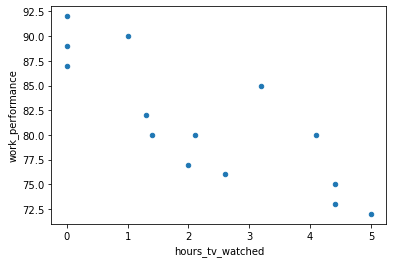

In [3]:
#this code simulates survey of a few people, in which they
#revealed the amount of television they watched, on average,
#in a day against a company-standard work performance metric
import pandas as pd
hours_tv_watched = [0, 0, 0, 1, 1.3, 1.4, 2, 2.1, 2.6, 3.2, 4.1, 4.4,
                  4.4, 5]

#work performance is a scale out of 100
work_performance = [87, 89, 92, 90, 82, 80, 77, 80, 76, 85, 80, 75, 
                    73, 72]

df = pd.DataFrame({'hours_tv_watched':hours_tv_watched, 'work_performance':work_performance})

df.plot(x='hours_tv_watched', y='work_performance', kind='scatter')

## Line Graphs
Widely used, popular for showing changes in variables over time with x=time. Used for Quant variables.

## Bar Charts
Turn to these when trying to compare variables across groups. $x$-axis is generally a categorical variable, $y$-axis is generally quantitative.

Text(0, 0.5, 'Count')

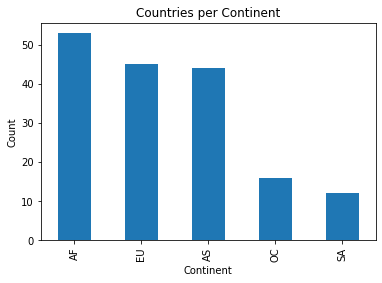

In [5]:
from matplotlib import pyplot as plt
drinks = pd.read_csv('drinks.csv')
drinks.continent.value_counts().plot(kind='bar', title='Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Count')

<AxesSubplot:xlabel='continent'>

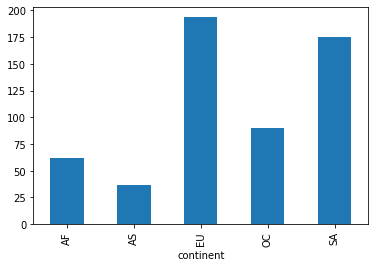

In [6]:
drinks.groupby('continent').beer_servings.mean().plot(kind='bar')

Note that a scatter plot or a line graph would not be able to support this data because they can only handle quant variables, bar graphs have the ability to demonstrate categorical values.

We can also use bar charts to graph variables that change over time, like a line graph.

## Histograms
Show the frequency distribution of a single quantititive variable by splitting the data, by range, into equidistant *bins* and plotting the raw count of observations per bin.

Note that I don't have the data in the book, so I will use Kaggle Housing data again. They build a histogram of customers in the first store. I will instead build a histogram of housing LotArea

In [8]:
housing_sales = pd.read_csv('Kaggle Housing/train.csv')

In [9]:
housing_sales.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
housing_sales.LotShape.describe()

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object

In [11]:
#restrict to only regular LotShapes
Reg_housing_area= housing_sales[housing_sales['LotShape']=='Reg']

In [12]:
Reg_housing_area.shape

(925, 81)

Text(0, 0.5, 'Count')

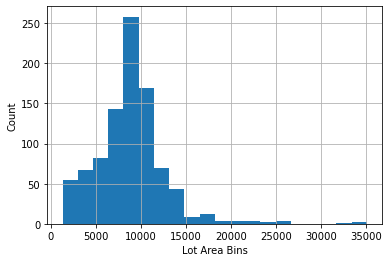

In [13]:
Reg_housing_area['LotArea'].hist(bins=20)
plt.xlabel('Lot Area Bins')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

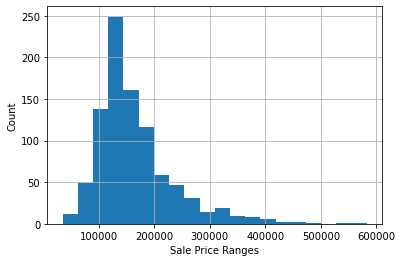

In [14]:
#just for fun, I will do this for saleprice too
Reg_housing_area['SalePrice'].hist(bins=20)
plt.xlabel('Sale Price Ranges')
plt.ylabel('Count')

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

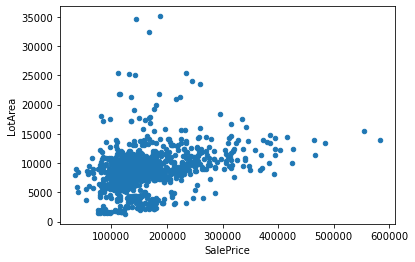

In [15]:
#for fun, I'm going to do a scatter plot of Sale Price vs Lot Area
Reg_housing_area.plot(x='SalePrice', y='LotArea', kind = 'scatter')

Cool! Looks like a pretty decent relationship between Lot Area and Sale Price - as expected!

## Box Plots
Used to show the distribution of values. Plot a 5 number summary
- Minimum value
- First Quartile
- Median
- Third Quartile
- Maximum value

<AxesSubplot:title={'center':'beer_servings'}, xlabel='continent'>

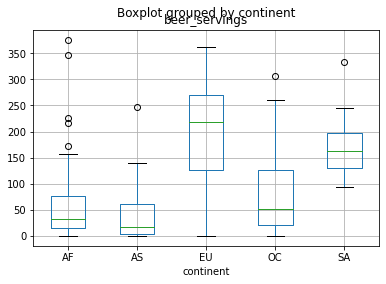

In [16]:
drinks.boxplot(column='beer_servings', by='continent')

<AxesSubplot:>

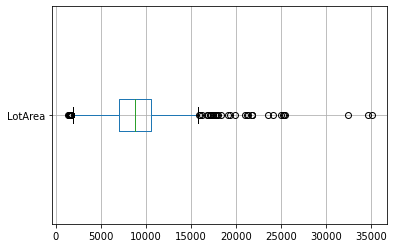

In [18]:
Reg_housing_area.boxplot(column='LotArea', vert=False)

In [19]:
Reg_housing_area['LotArea'].describe()

count      925.000000
mean      8876.915676
std       3873.766826
min       1300.000000
25%       7018.000000
50%       8800.000000
75%      10542.000000
max      35133.000000
Name: LotArea, dtype: float64

Note that in the example in the book, there were a bunch of outliers at 0 which demonstrated how much better histogram was at capturing extreme outliers. However, box plot is much better at displaying percentile information.

## When Graphs and Statistics Lie

### Correlation vs Causation

**Correlation** is a quantitative metric between -1 and 1 that measures how two variables *move with each other*. Close to -1 means strong negative correlation, increase in one variable means decrease in the other, close to 1 means increase in one variable means increase in other and vice versa.

**Causation** is the idea that one variable affects another. 

Recall the TV example earlier, we can calculate its correlation coefficient:

In [20]:
df.corr()

,hours_tv_watched,work_performance
hours_tv_watched,1.000000,-0.824753
work_performance,-0.824753,1.000000


-0.82 implies a pretty strong negative correlation, so this supports hypothesis that variables are negatively causally linked. Both the visuals and numbers align (graph looks like there's a negative correlation between the variables)

**Important:** When the visuals and your metrics don't align, people are less likely to take your analysis seriously.

#### Some reasons why Correlation may not equal Causation
- *confounding factors* - a third variable that may act as a bridge between variables. IE. Watching more TV doesn't necessarily directly cause poor performance, perhaps its that employees are sacrificing sleep, or watching on work time.
- *coincidence* - ie. per capita consumption of mozzarella increases with the number of civil engineering degrees. Doesn't mean they're causally linked

#### Simpson's paradox
The paradox states that a correlation between any two variables can be completely reversed when we take different factors into accounts. Even if a graph shows a positive correlation, a confounding factor can always be introduced that makes them *anti-correlated*

In the book the example of breaking down demographic groups more completely when looking at AB testing shows that unbalance in the classes leads to one class looking better overall when infact its not as good.

A resolution to Simpson's paradox exists, but the proof lies in a complex system of Bayesian networks outside the scope of the book.

The takeaway from this is that we shoudl not unduly give causational power to correlated variables. As there may be confounding factors, if you find a correlation **you should absolutely try to isolate as many variables as possible that might be the reason for the correlation, or can at least help explain your case further**

#### Best way to confidently obtain causality:

Randomized experiments! Split the population up into population groups, randomly sample them and run hypothesis tests to conclude, with a great degree of certainty, that there is a true causation between variables.

### 6 Steps to present to a formal audience
The following process ensures we hit on all major areas of data science method. Your words should be actionable, and show a clear path to completion of the project and future steps to take.
1. Outline the state of the problem:
    - what the problem is,
    - how it came to data scientist attention
2. Define the nature of the data:
    - Who the problem affects
    - Previous Work done, if any
3. Divulge an initial hypothesis:
    - state what is believe to be the solution, before doing work
    - outline your hypothesis or hypothesis of whole company
4. Describe the solution and, possibly, the tools that led to the solution
    - How you solved problem
    - statistical tests used, if any
    - assumptinos that were made
5. Share the impact that your solution will have on the problem
    - Talk about whether your solution was different from initial hypothesis
    - What will this mean for the future?
    - How can we take action on this solution to improve ourselves and our company?
6. Future steps
    - Share future steps 
    - how to implement solution
    - further work & reasearch sparked by this
  
  

### Speaking to less formal audience
Use the **Why/How/What Strategy**. Author used this strategy in this chapter - Data-Scienceception!